In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.preprocessing import normalize

dim = 3
beta = np.array([10, -5, 20])
sigma = 0.5
cov = np.array([[1,0,0],[0,1,0],[0,0,1]])
alpha = 1e-3










In [2]:
def epsilon(size = 1):
    return np.random.normal(scale = sigma**2, size = size)


class AgentClass: 
    
    def __init__(self):
        self.num_agents = 100
        self.features = np.random.multivariate_normal(np.zeros(3), cov=cov, size = (self.num_agents))
        self.mu = np.zeros((self.num_agents,dim))
        self.frequency = 0
        self.labels = self.features @ beta + epsilon(size = self.num_agents)
        self.scale = 0.01
        
    def loss(self,theta):
        return np.mean(self.mu @ theta)
    
    def action_noise(self):
        return np.random.normal(scale = self.scale, size = (self.num_agents,dim))
    def update(self,theta):
        self.mu +=  alpha * theta #theta is negative so gradient descent step is additive
        self.mu += self.action_noise()
        self.mu = normalize(self.mu) * B
        
        
    
    

In [3]:
class ModelClass:
    
    def __init__(self, agents):
        self.theta = np.random.randint(low=-5, high=5, size=3)
        self.frequency = 0
        self.agents = agents
        
    def loss(self):
        X = self.agents.features + self.agents.mu  
        return 0.5 * np.mean(X @ self.theta - self.agents.labels)**2
    
    def LSS(self, X, labels): 
        return np.linalg.pinv(X.T @ X) @ X.T @ labels 
    
    def update(self):
        X = self.agents.features + self.agents.mu  
        self.theta = self.LSS(X, self.agents.labels)


    

In [4]:
#adjustable hyperparameters
def set_B(B_val = 1):
    global B
    global L 
    global R 
    global SRL 
    global SRR
    
    B = B_val
    min_term = min(1,B)
    L = (sigma**2 / 2)  + ((np.linalg.norm(beta)**2) * min_term**2) / (2*(1+min_term)**2)
    R = -1 * (np.linalg.norm(beta)*B_val) / (1 + B_val**2)
    SRL = sigma**2/2 + (np.linalg.norm(beta)**2 * B_val**2) / (2+2*B**2)
    SRR = -1 * (np.linalg.norm(beta)*min_term) / (1 + min_term**2) 



set_B()


In [5]:
t = 1
T = int(3e3)

def get_losses(agents, model):

    agent_losses= [0 for _ in range(T)]
    model_losses = [0 for _ in range(T)]
    agent_losses[0] = agents.loss(model.theta)
    model_losses[0] = model.loss()
    for t in range(T):
        if t % agents.frequency == 0:
            agents.update(model.theta)
        if t % model.frequency == 0: 
            model.update()
        agent_losses[t] = agents.loss(model.theta)
        model_losses[t] = model.loss()
    return agent_losses, model_losses

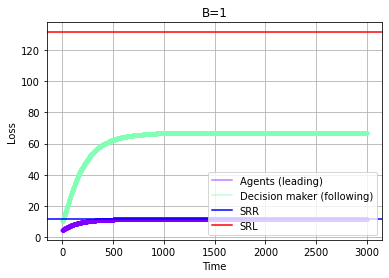

65.74999999999999 -11.4564392373896 131.37499999999997 -11.4564392373896


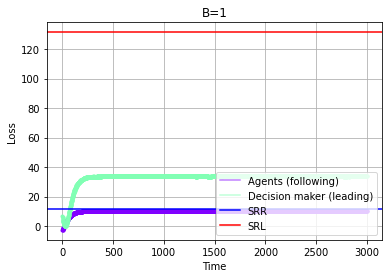

65.74999999999999 -11.4564392373896 131.37499999999997 -11.4564392373896


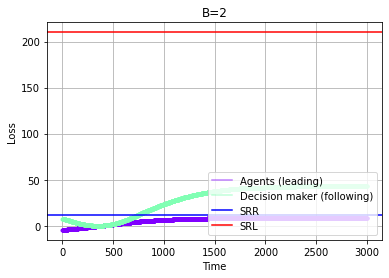

65.74999999999999 -9.16515138991168 210.12499999999994 -11.4564392373896


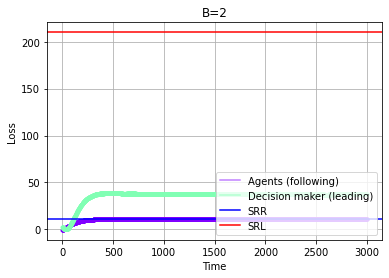

65.74999999999999 -9.16515138991168 210.12499999999994 -11.4564392373896


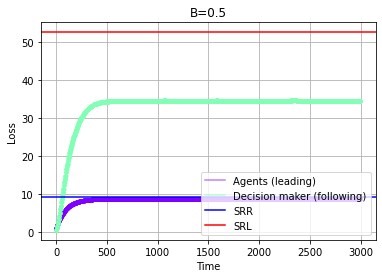

29.29166666666666 -9.16515138991168 52.624999999999986 -9.16515138991168


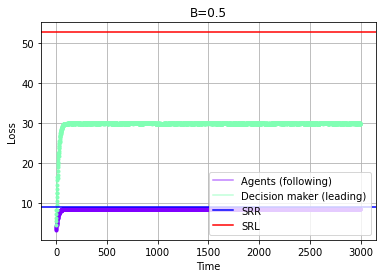

29.29166666666666 -9.16515138991168 52.624999999999986 -9.16515138991168


In [6]:
#graphing
def plot_losses(agent_losses, model_losses, labels = ["Agents", "Decision Maker"]):
    timesteps = [time for time in range(len(agent_losses))]
    colors = iter(plt.cm.rainbow(np.linspace(0, 0.5, 2)))
    losses = [agent_losses, model_losses]
    for l, c, lab in zip(losses,colors, labels):
        plt.plot(timesteps, l, '.', color=c)
        plt.plot(timesteps, l, alpha=0.5, color=c, label= lab)
    
    plt.axhline(-SRR, color = 'b', label = "SRR")
    plt.axhline(SRL, color = 'r', label = "SRL")
    plt.legend(loc="lower right")
    plt.xlabel("Time")
    plt.ylabel("Loss")
    plt.title("B="+str(B))
    plt.grid()
    plt.show()
    print(L, R, SRL, SRR)


Bs = [1,2,0.5]
for b in Bs:
    agents = AgentClass()
    model = ModelClass(agents)
    set_B(B_val=b)
    #model reactive (agents lead)
    model.frequency = 1
    agents.frequency = 5
    agent_losses, model_losses = get_losses(agents, model)
    plot_losses(agent_losses, model_losses, labels = ["Agents (leading)", "Decision maker (following)"])
    
    #model proactive (model leads)
    agents = AgentClass()
    model = ModelClass(agents)
    model.frequency = 5
    agents.frequency = 1
    agent_losses, model_losses = get_losses(agents,model)
    plot_losses(agent_losses, model_losses, labels = ["Agents (following)", "Decision maker (leading)"])